# Anisotropic diffusion operator for the VEF discretization in TRUST

## Introduction
Validation made by :  Elie Saikali and Pierre Ledac.\
Report generated 27/05/2021.

In [1]:
from trustutils import run

run.introduction("Elie Saikali and Pierre Ledac.","27/05/2021")

## Introduction 
 Validation made by : Elie Saikali and Pierre Ledac.



 Report created : 27/05/2021



 Report generated 28/01/2022

### Description

This document presents a validation regarding the implementation of the anisotropic diffusion operator in the TRUST platform. Only the VEF discretisation is considered in the present work. Different simulations are performed and numerical results at steady-state are compared to analytical solutions for validations. Two test cases are investigated in this work. The first one is to validate a 2D heat conduction problem with an anisotropic discontinuous conductivity tensor, while the second with an anisotropic non-uniform conductivity tensor. For the second test case, the sensitivity of the mesh and the influence of the anisotropy ratio is also reported. The reader is kindly invited to check PH. Mairea and J. Breil for a detailed discussion concerning the studied test cases, (https://hal.archives-ouvertes.fr/hal-00605548/document).

The 2D heat conduction equation is expressed as
\begin{equation}\label{cond}
\rho c_p \frac{\partial T}{\partial t} - \nabla\cdot (\kappa\nabla T)=\dot{q_v}.
\end{equation}
$\rho$ [kg.m$^{-3}$] denotes the density field, $c_p$ [J.kg$^{-1}$.K$^{-1}$] the specific heat capacity, $\kappa$ [W.K$^{-1}$.m$^{-1}$] the heat conductivity tensor and $\dot{q_v}$ [W.m$^{-3}$] the volumetric heat source term. The domain considerd is $\Omega=[0,1]^2 \in \mathbb{R}^2$. Both $\rho$ and $c_p$ fields are assumed constant and uniform; their values are set to unity. 

Regarding the source term $\dot{q_v}$ and the conductivity tensor, the employed formulations are dependant of the treated test case and will be discussed later in each section. For both cases, the MedCoupling library offered within the TRUST platform is used to generate the components of the tensor $\kappa$. Same for the formulation of the source term, the SYMPY library from python3 is used. We would like to invite the reader to check the document _useful\_scripts.pdf_ for further information regarding the preparation of the numerical simulations. 



In [2]:
run.TRUST_parameters("1.8.0")

### TRUST parameters 
 * Version TRUST: 1.8.0
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/Verification/Verification_codage/diffusion_anisotrope_VEF/build)

In [3]:
from trustutils import run 
c1 = run.addCase("TC1","TC1.data"    ,nbProcs=1)
c2 = run.addCase("TC2/Ar1/M1","TC2.data"    ,nbProcs=1)
c3 = run.addCase("TC2/Ar1/M2","TC2.data"    ,nbProcs=2)
c4 = run.addCase("TC2/Ar1/M3","TC2.data"    ,nbProcs=4)
c5 = run.addCase("TC2/Ar1_iso/M1","TC2_iso.data",nbProcs=1) 
c6 = run.addCase("TC2/Ar1_iso/M2","TC2_iso.data",nbProcs=2)
c7 = run.addCase("TC2/Ar1_iso/M3","TC2_iso.data",nbProcs=4)
c8 = run.addCase("TC2/Ar10/M1","TC2.data"    ,nbProcs=1)
c9 = run.addCase("TC2/Ar10/M2","TC2.data"    ,nbProcs=2)
c10 = run.addCase("TC2/Ar10/M3","TC2.data"    ,nbProcs=4) 
c11 = run.addCase("TC2/Ar100/M1","TC2.data"    ,nbProcs=1)
c12 = run.addCase("TC2/Ar100/M2","TC2.data"    ,nbProcs=2)
c13 = run.addCase("TC2/Ar100/M3","TC2.data"    ,nbProcs=4) 
c14 = run.addCase("TC2/Ar1000/M1","TC2.data"    ,nbProcs=1)
c15 = run.addCase("TC2/Ar1000/M2","TC2.data"    ,nbProcs=2)
c16 = run.addCase("TC2/Ar1000/M3","TC2.data"    ,nbProcs=4) 
run.printCases()
run.runCases()

### Test cases 
* TC1/TC1.data : 
* TC2/Ar1/M1/TC2.data : 
* TC2/Ar1/M2/TC2.data : 
* TC2/Ar1/M3/TC2.data : 
* TC2/Ar1_iso/M1/TC2_iso.data : 
* TC2/Ar1_iso/M2/TC2_iso.data : 
* TC2/Ar1_iso/M3/TC2_iso.data : 
* TC2/Ar10/M1/TC2.data : 
* TC2/Ar10/M2/TC2.data : 
* TC2/Ar10/M3/TC2.data : 
* TC2/Ar100/M1/TC2.data : 
* TC2/Ar100/M2/TC2.data : 
* TC2/Ar100/M3/TC2.data : 
* TC2/Ar1000/M1/TC2.data : 
* TC2/Ar1000/M2/TC2.data : 
* TC2/Ar1000/M3/TC2.data : 


Running ...
  => A total of 16 cases were (successfully) run in 263.9s.


## Test case 1 :  anisotropic and discontinuous $\kappa$

For this test case, the source term is set to zero; $\dot{q_v}=0$. The heat conductivity tensor is anisotropic and discontinuous, defined $\forall (x,y)\in \Omega$ as 

\begin{equation}\label{tensor_c1}
\kappa(x,y)=
\left\{
\begin{aligned}
&\displaystyle\left(\begin{matrix} \kappa_l^{xx} & \kappa_l^{xy} \\ \kappa_l^{yx} & \kappa_l^{yy} \end{matrix}\right) \quad : \quad x\in[0,0.5], \\
&\displaystyle\left(\begin{matrix} \kappa_r^{xx} & \kappa_r^{xy} \\ \kappa_r^{yx} & \kappa_r^{yy} \end{matrix}    \right) \quad : \quad x\in[0.5,1].
\end{aligned}
\right.
\end{equation}

For such a $\kappa$ distribution, the analytical solution $T_{exact}$ is one-dimensional. With the Dirichlet boundary conditions defined as $T_{exact}(x=0)=0$ and $T_{exact}(x=1)=1$, the solution reads as
\begin{equation}
\label{sol_c1}
T_{exact}(x)=\left\{
\begin{aligned}
&\displaystyle x\frac{2\kappa_r^{xx}}{\kappa_l^{xx}+\kappa_r^{xx}} \quad &: \quad x\in[0,0.5], \\
&\displaystyle\frac{\kappa_r^{xx}-\kappa_l^{xx}}{\kappa_r^{xx}+\kappa_l^{xx}} + x\frac{2\kappa_l^{xx}}{\kappa_l^{xx}+\kappa_r^{xx}}\quad &: \quad x\in[0.5,1].
\end{aligned}
\right.
\end{equation}

The mesh is triangular, generated by the MCADSurf algorith and consists of 2500 triangles (edge length between 0.02-0.03), thanks to the open source SALOME platform (see figure 2.1).  The boundary conditions at the left and at the right walls are set to $T=0$ and 1 K respectively. At the top and the bottom boundaries, a Dirichlet condition is prescribed satisfying the equation \eqref{sol_c1}.

For the numerical simulation, we assume $\kappa_l^{xx}=1$, $\kappa_l^{xy}= \kappa_l^{yx}=-1$, $\kappa_l^{yy}=4$, $\kappa_r^{xx}=10$, $\kappa_r^{xy}= \kappa_r^{yx}=-3$ and  $\kappa_r^{yy}=2$. The resulting components of the tensor are illustrated in figures 2.2-2.4 where the discontinuity of the fields is clearly noted. Figure 2.5 depict the temperature distribution at the steady state (physical time about 0.5 s). The error relative to the exact solution is considered in figure 2.6.  It is clear how the difference between the numerical and exact solution is very small. 




### Mesh


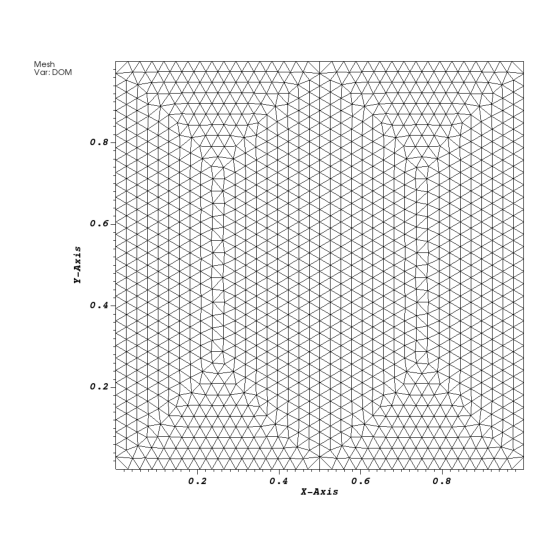

In [4]:
from trustutils import visit

a = visit.Show("TC1/TC1.lata", "Mesh" ,"DOM")
a.visuOptions(['no_databaseinfo'])
a.plot()

### Conductivity tensor : component 1

### Mesh

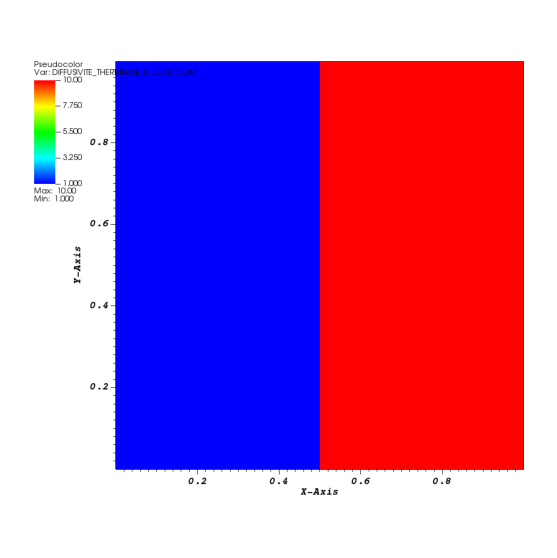

In [5]:
a = visit.Show("TC1/TC1_VOLUME.lata","Pseudocolor","DIFFUSIVITE_THERMIQUE_0_ELEM_DOM",plotmesh=False)
a.visuOptions(['no_databaseinfo'])
a.plot()

### Conductivity tensor : component 2 (or 3)

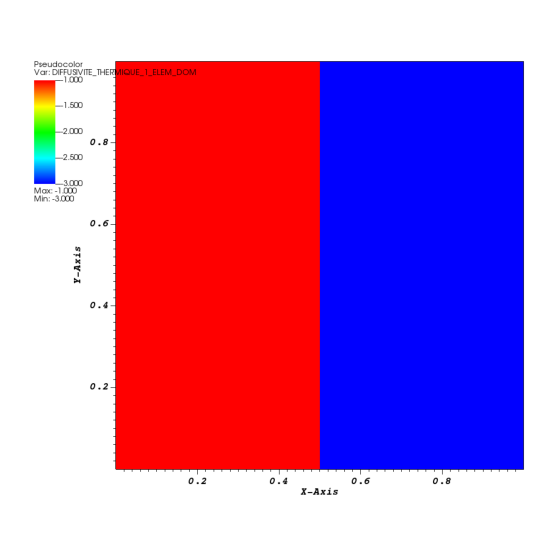

In [6]:
a = visit.Show("TC1/TC1_VOLUME.lata","Pseudocolor","DIFFUSIVITE_THERMIQUE_1_ELEM_DOM",plotmesh=False)
a.visuOptions(['no_databaseinfo'])
a.plot()

### Conductivity tensor : component 4

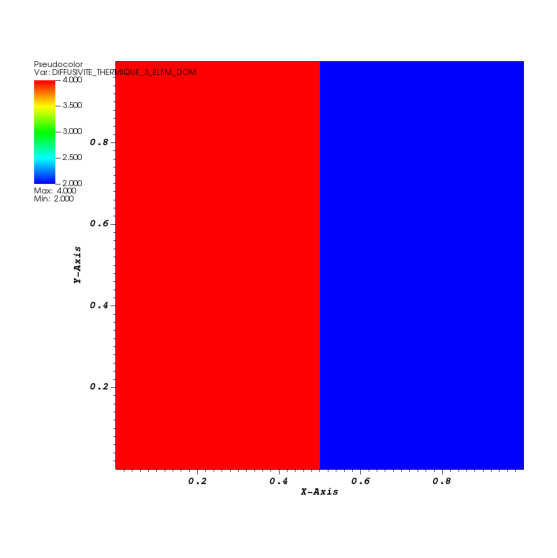

In [7]:
a = visit.Show("TC1/TC1_VOLUME.lata","Pseudocolor","DIFFUSIVITE_THERMIQUE_3_ELEM_DOM",plotmesh=False)
a.visuOptions(['no_databaseinfo'])
a.plot()

### Temperature at steady state

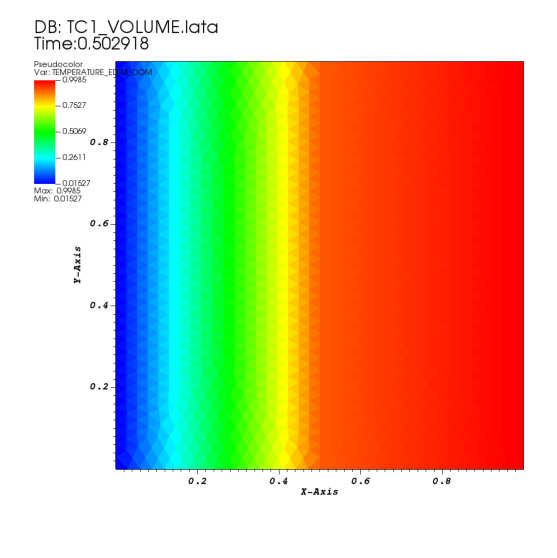

In [8]:
visit.showField("TC1/TC1_VOLUME.lata","Pseudocolor","TEMPERATURE_ELEM_DOM",plotmesh=False)

### Difference from analytical solution

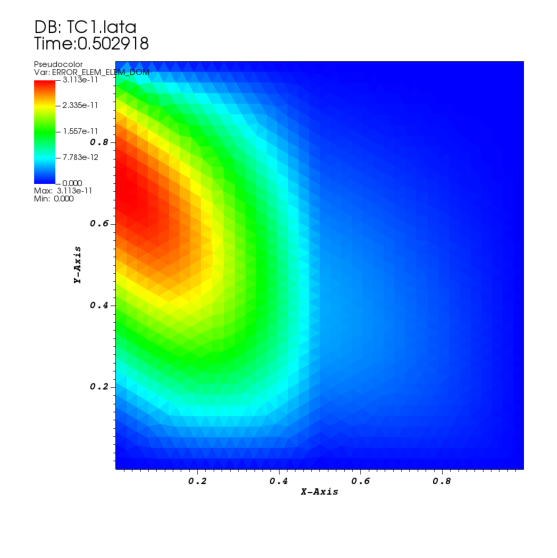

In [9]:
visit.showField("TC1/TC1.lata","Pseudocolor","ERROR_ELEM_ELEM_DOM",plotmesh=False)

## Test case 2 :  anisotropic and non-uniform $\kappa$

The conductivity tensor for this case is anisotropic and non-uniform in $\Omega$, expressed as
\begin{equation}\label{tensor_c2}
\kappa(x,y)=\left(\begin{matrix} \eta x^2 +y^2 & -(1-\eta)xy \\ -(1-\eta)xy & x^2 + \eta y^2 \end{matrix}\right). 
\end{equation}
Here $\eta$ is a positive parameter characterizing the level of anisotropy. We note the anisotropy ratio as
\begin{equation}
A_r=\frac{1}{\eta}.
\end{equation}

Moreover, a thermal source term $\dot{q_v}$ is applied to the system in this test case. Its formulation is defined so that the analytical solution of the problem is 
\begin{equation}\label{sol_c2}
T_{exact}(x,y)=\sin^2(\pi x)\sin^2(\pi y).
\end{equation}
On the boundaries $\partial \Omega$, a Dirichlet boundary condition $T(x,y,t)=0$ is prescribed. 

In order to highlight the inflence of the anisotropy, four values of $A_r$ are investigated; respectively 1, 10, 100 and 1000. This leads not only to different values in the components of the $\kappa$ tensor, but also to different source term that verifies the exact solution \eqref{sol_c2}. In this work, we use the SYMPY library to derive the expression of $\dot{q_v}$ depending on the considered $A_r$. Recall that SYMPY is a library provided with python3 and TRUST. It allows manipulating mathematical operartions with symbolic variables; here the term $-\nabla.(\kappa \nabla T=\dot{q_v}$ (at steady state). See the document *useful\_scripts.pdf* for further information on evaluating the expression of $\dot{q_v}$.

We denote by $\dot{q_v}^1$ the source term corresponding to $A_r=1$ ($\eta=1$). Similarly, $\dot{q_v}^{10}$ is referred to for the case of $A_r=10$ ($\eta=0.1$), $\dot{q_v}^{100}$ for $A_r=100$ ($\eta=0.01$) and $\dot{q_v}^{1000}$ for $A_r=1000$ ($\eta=0.001$). Following these notations, the imposed source terms are respectively expressed as

\begin{multline}
\dot{q_v}^1=- 4.0 \pi x \sin{\left(\pi x \right)} \sin^{2}{\left(\pi y \right)} \cos{\left(\pi x \right)}     - 4.0 \pi y \sin^{2}{\left(\pi x \right)} \sin{\left(\pi y \right)} \cos{\left(\pi y \right)} +\\ 2     \pi^{2} \left(x^{2} + 1.0 y^{2}\right) \sin^{2}{\left(\pi x \right)} \sin^{2}{\left(\pi y \right    )} - 2 \pi^{2} \left(x^{2} + 1.0 y^{2}\right) \sin^{2}{\left(\pi x \right)} \cos^{2}{\left(\pi y     \right)} +\\ 2 \pi^{2} \left(1.0 x^{2} + y^{2}\right) \sin^{2}{\left(\pi x \right)} \sin^{2}{\left(    \pi y \right)} - 2 \pi^{2} \left(1.0 x^{2} + y^{2}\right) \sin^{2}{\left(\pi y \right)} \cos^{2}{    \left(\pi x \right)} 
\end{multline}

\begin{multline}
\dot{q_v}^{10}=7.2 \pi^{2} x y \sin{\left(\pi x \right)} \sin{\left(\pi y \right)} \cos{\left(\pi x \right)} \cos{\left(\pi y \right)} + 1.4 \pi x \sin{\left(\pi x \right)} \sin^{2}{\left(\pi y \right)} \cos{\left(\pi x \right)} +\\ 1.4 \pi y \sin^{2}{\left(\pi x \right)} \sin{\left(\pi y \right)} \cos{\left(\pi y \right)} + 2 \pi^{2} \left(0.1 x^{2} + y^{2}\right) \sin^{2}{\left(\pi x \right)} \sin^{2}{\left(\pi y \right)} -\\ 2 \pi^{2} \left(0.1 x^{2} + y^{2}\right) \sin^{2}{\left(\pi y \right)} \cos^{2}{\left(\pi x \right)} + 2 \pi^{2} \left(x^{2} + 0.1 y^{2}\right) \sin^{2}{\left(\pi x \right)} \sin^{2}{\left(\pi y \right)} -\\ 2 \pi^{2} \left(x^{2} + 0.1 y^{2}\right) \sin^{2}{\left(\pi x \right)} \cos^{2}{\left(\pi y \right)} \quad \quad \quad \quad
\end{multline}

\begin{multline}
\dot{q_v}^{100}=7.92 \pi^{2} x y \sin{\left(\pi x \right)} \sin{\left(\pi y \right)} \cos{\left(\pi x \right)} \cos{\left(\pi y \right)} + 1.94 \pi x \sin{\left(\pi x \right)} \sin^{2}{\left(\pi y \right)} \cos{\left(\pi x \right)} +\\ 1.94 \pi y \sin^{2}{\left(\pi x \right)} \sin{\left(\pi y \right)} \cos{\left(\pi y \right)} + 2 \pi^{2} \left(0.01 x^{2} + y^{2}\right) \sin^{2}{\left(\pi x \right)} \sin^{2}{\left(\pi y \right)} -\\ 2 \pi^{2} \left(0.01 x^{2} + y^{2}\right) \sin^{2}{\left(\pi y \right)} \cos^{2}{\left(\pi x \right)} + 2 \pi^{2} \left(x^{2} + 0.01 y^{2}\right) \sin^{2}{\left(\pi x \right)} \sin^{2}{\left(\pi y \right)} -\\ 2 \pi^{2} \left(x^{2} + 0.01 y^{2}\right) \sin^{2}{\left(\pi x \right)} \cos^{2}{\left(\pi y \right)} \quad \quad \quad \quad
\end{multline}

\begin{multline}
\dot{q_v}^{1000}=7.992 \pi^{2} x y \sin{\left(\pi x \right)} \sin{\left(\pi y \right)} \cos{\left(\pi x \right)} \cos{\left(\pi y \right)} + 1.994 \pi x \sin{\left(\pi x \right)} \sin^{2}{\left(\pi y \right)} \cos{\left(\pi x \right)} +\\ 1.994 \pi y \sin^{2}{\left(\pi x \right)} \sin{\left(\pi y \right)} \cos{\left(\pi y \right)} + 2 \pi^{2} \left(0.001 x^{2} + y^{2}\right) \sin^{2}{\left(\pi x \right)} \sin^{2}{\left(\pi y \right)} -\\ 2 \pi^{2} \left(0.001 x^{2} + y^{2}\right) \sin^{2}{\left(\pi y \right)} \cos^{2}{\left(\pi x \right)} + 2 \pi^{2} \left(x^{2} + 0.001 y^{2}\right) \sin^{2}{\left(\pi x \right)} \sin^{2}{\left(\pi y \right)} -\\ 2 \pi^{2} \left(x^{2} + 0.001 y^{2}\right) \sin^{2}{\left(\pi x \right)} \cos^{2}{\left(\pi y \right)} \quad \quad \quad \quad
\end{multline}

Finally, to correctly investigate the influence of the anisotropy ratio on the quality of the numerical solution, three meshes are considered for this test case. They are respectively referred to by M1, M2 and M3. M1 is the coarsest one and consists of 4802 triangles (edge length between 0.02-0.04). M2 is here an intermediate resolution mesh and consists of 15842 triangles computed over 2 MPI procs are used for this computational domain (edge length between 0.01-0.03). The finest one is M3 with 64082 triangles computed over 4 MPI procs are used for this computational domain (edge length between 0.005-0.007). We imphasize here that the idea is **not to perform a mesh convergence analysis**, but analyze the influence of the mesh by showing how a fine resolution is required when $A_r$ becomes important. Figures 3.1-3.3 depict the three meshes used for this test case. Numerical results, at steady state, are discussed and compared to the analytical solution \eqref{sol_c2} in sections 4 to 7.




### The Mesh M1

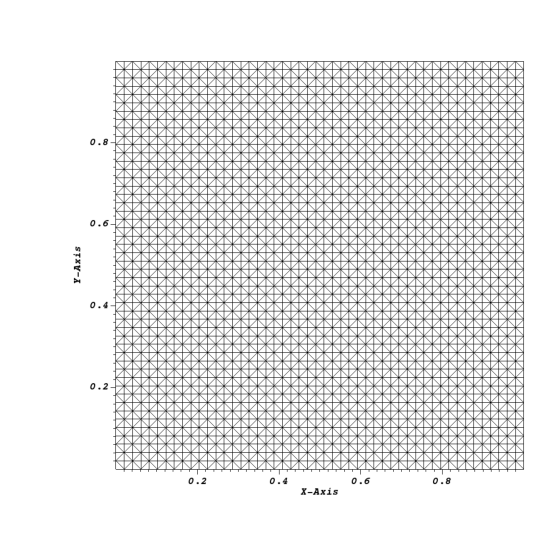

In [10]:
a = visit.Show("TC2/Ar100/M1/TC2.lata","Mesh","DOM")
a.visuOptions(['no_databaseinfo','no_legend'])
a.plot()

### The Mesh M2

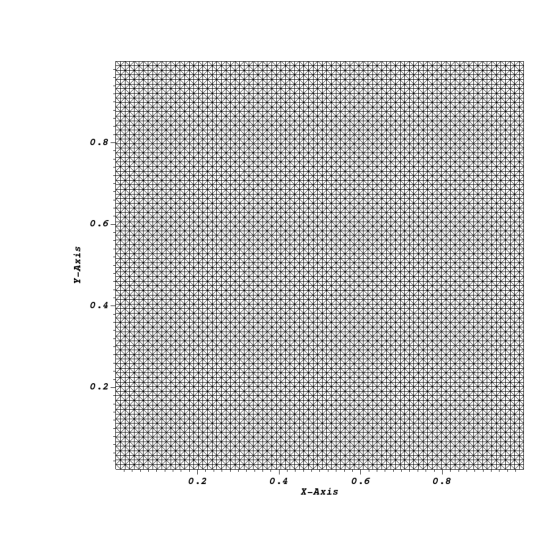

In [11]:
a = visit.Show("TC2/Ar100/M2/TC2.lata","Mesh","DOM")
a.visuOptions(['no_databaseinfo','no_legend'])
a.plot()

### The Mesh M3

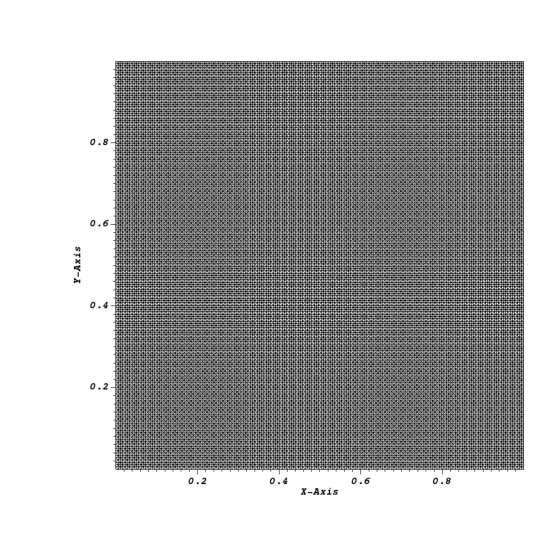

In [12]:
a = visit.Show("TC2/Ar100/M3/TC2.lata","Mesh","DOM")
a.visuOptions(['no_databaseinfo','no_legend'])
a.plot()

## Results of test case 2 with $Ar= 10$

When the anisotropy ratio is set to unity, the obtained conductivity tensor is diagonal $\kappa_{xy} = \kappa_{yx} = 0$.
The diagonal components are non zero and identical; $\kappa_{xx} = \kappa_{yy}$. The fields are visualized in figures 4.1-4.3 where we note that the conductivity is diagonally distributed in the domain; highest values at the
top right corner, and diffuses symmetrically to the facing corner where it takes the smallest value. The obtained temperature distribution at steady state with mesh M1 (physical time about 5.3 s) is shown in figure 4.4 and the difference from the analytical solution is illustrated in absolute value in figure 4.5. It can be stated that the solution is not far and not different from the exact solution, although the error values are not too small compared to test case 1; here the difference can reach to about 1.$10^{−3}$ K. With M2, the resolution is improved and the time required to reach a steady state is reduced (4.3 s of physical time). This can be illustrated in figures 4.6 and 4.7. Moreover, better improvements are recorded with M3: steady state reaches at 3.7 s, and absolute error about 8.$10^{−5}$ K at maximum (see figures 4.8 and 4.9). However, we note that even with this fine resolution, the error is much larger than that of test case 1 (compared to $10^{−11}$ in that case). We interpret this issue to be related to the VEF discretization and the fact of the diffusion along the diagonal of the squared domain. To illustrate on this point and to justify that the situation is not originating from a bug in the code implementation, we test the same simulation with an isotropic conductivity taking the same values as $\kappa_{xx}$ (figure 4.10). It is clear how the obtained temperature and error fields are identical for the three meshes (figures 4.11 to 4.16) and thus
justifies the claimed interpretation. 

### Conductivity tensor : component 1

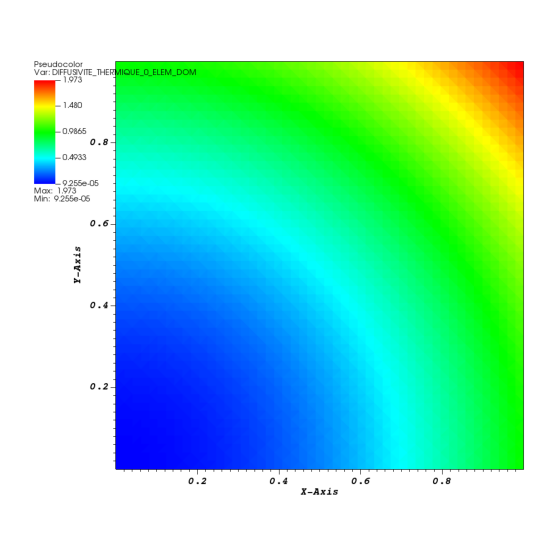

In [13]:
a = visit.Show("TC2/Ar1/M1/TC2_VOLUME.lata","Pseudocolor","DIFFUSIVITE_THERMIQUE_0_ELEM_DOM",plotmesh=False)
a.visuOptions(['no_databaseinfo'])
a.plot()

### Conductivity tensor : component 2 (or 3)

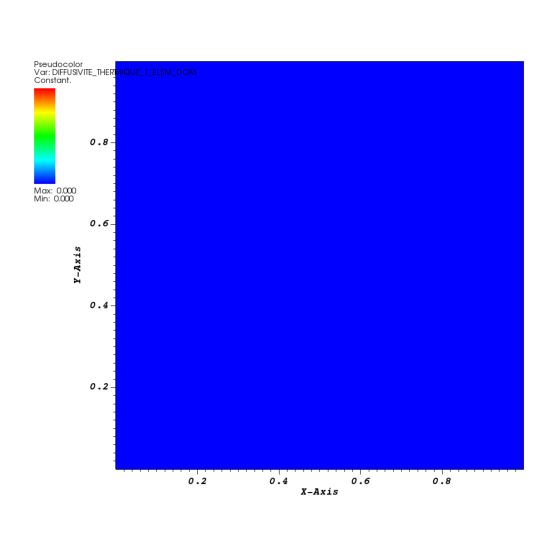

In [14]:
a = visit.Show("TC2/Ar1/M1/TC2_VOLUME.lata","Pseudocolor","DIFFUSIVITE_THERMIQUE_1_ELEM_DOM",plotmesh=False)
a.visuOptions(['no_databaseinfo'])
a.plot()

### Conductivity tensor : component 4

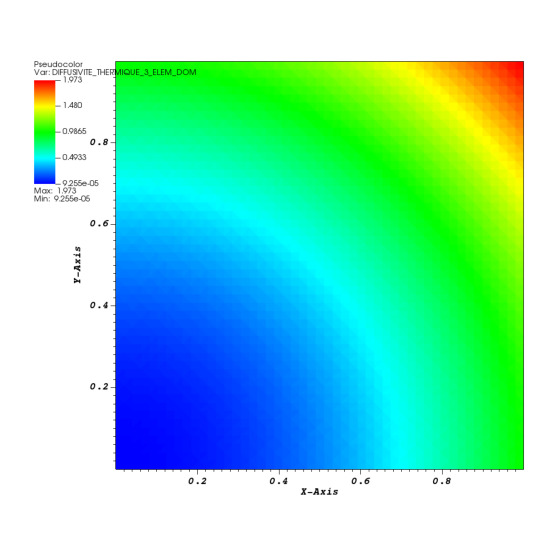

In [15]:
a = visit.Show("TC2/Ar1/M1/TC2_VOLUME.lata","Pseudocolor","DIFFUSIVITE_THERMIQUE_3_ELEM_DOM",plotmesh=False)
a.visuOptions(['no_databaseinfo'])
a.plot()

### Temperature at steady state : M1

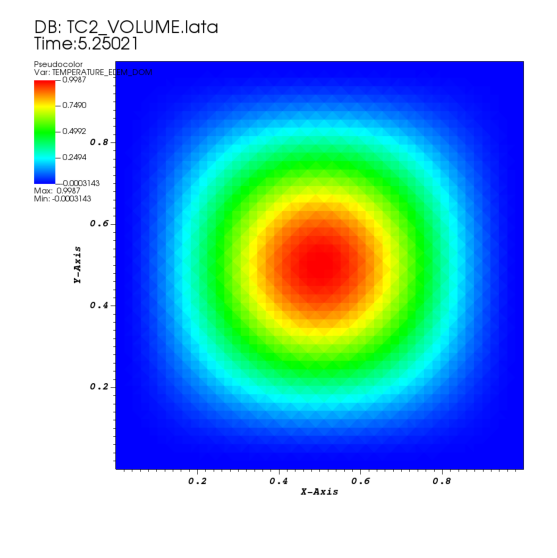

In [16]:
visit.showField("TC2/Ar1/M1/TC2_VOLUME.lata","Pseudocolor","TEMPERATURE_ELEM_DOM",plotmesh=False)

### Difference from analytical solution (absolute value) : M1

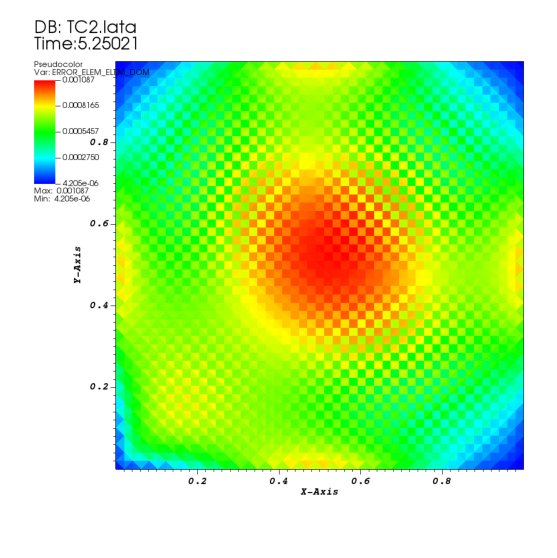

In [17]:
visit.showField("TC2/Ar1/M1/TC2.lata","Pseudocolor","ERROR_ELEM_ELEM_DOM",plotmesh=False)

### Temperature at steady state : M2

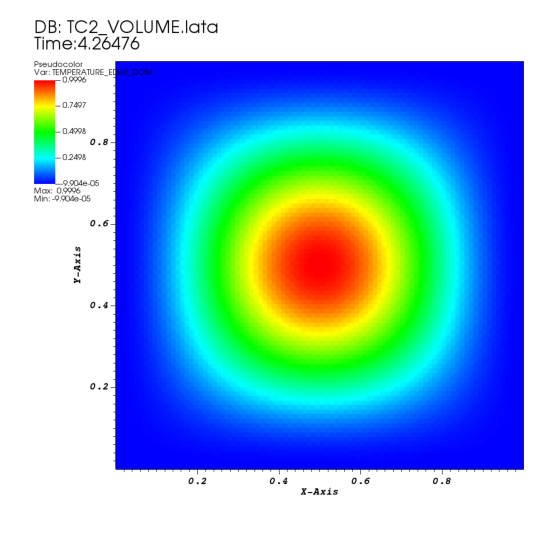

In [18]:
visit.showField("TC2/Ar1/M2/TC2_VOLUME.lata","Pseudocolor","TEMPERATURE_ELEM_DOM",plotmesh=False)

### Difference from analytical solution (absolute value) : M2

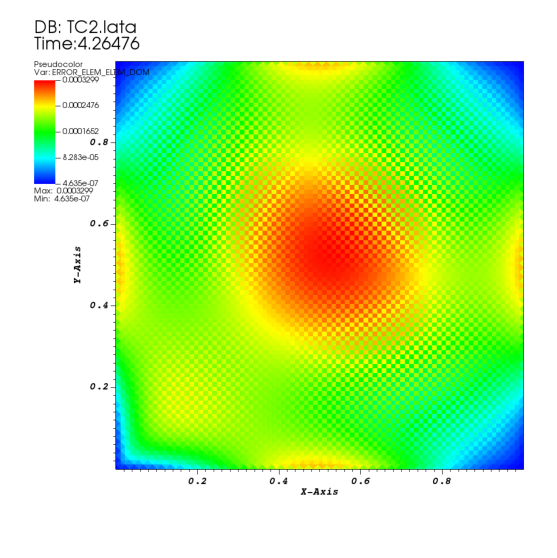

In [19]:
visit.showField("TC2/Ar1/M2/TC2.lata","Pseudocolor","ERROR_ELEM_ELEM_DOM",plotmesh=False)

### Temperature at steady state : M3

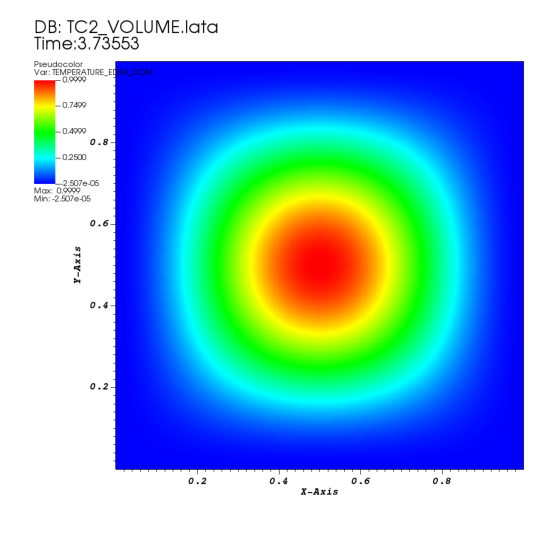

In [20]:
visit.showField("TC2/Ar1/M3/TC2_VOLUME.lata","Pseudocolor","TEMPERATURE_ELEM_DOM",plotmesh=False)

### Difference from analytical solution (absolute value) : M3

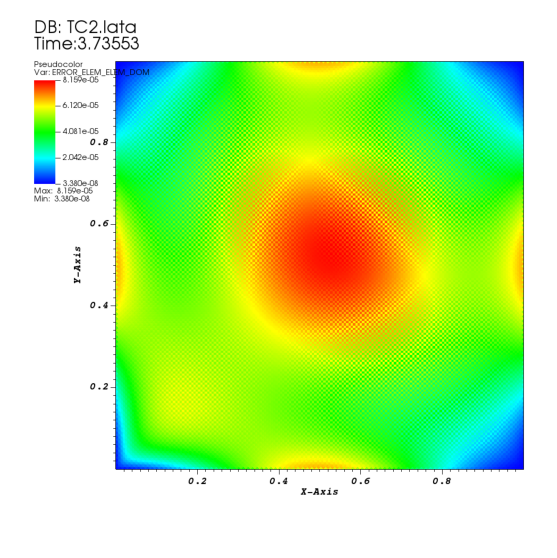

In [21]:
visit.showField("TC2/Ar1/M3/TC2.lata","Pseudocolor","ERROR_ELEM_ELEM_DOM",plotmesh=False)

### Isotropic conductivity field

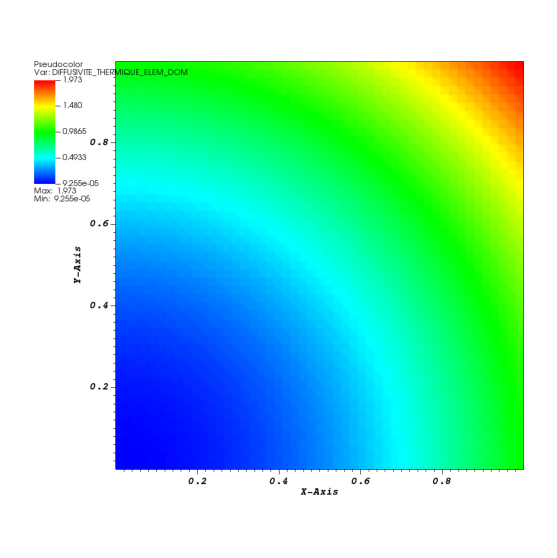

In [22]:
a = visit.Show("TC2/Ar1_iso/M1/TC2_iso_VOLUME.lata","Pseudocolor","DIFFUSIVITE_THERMIQUE_ELEM_DOM",plotmesh=False)
a.visuOptions(['no_databaseinfo'])
a.plot()

### Temperature at steady state (Isotropic conductivity) : M1

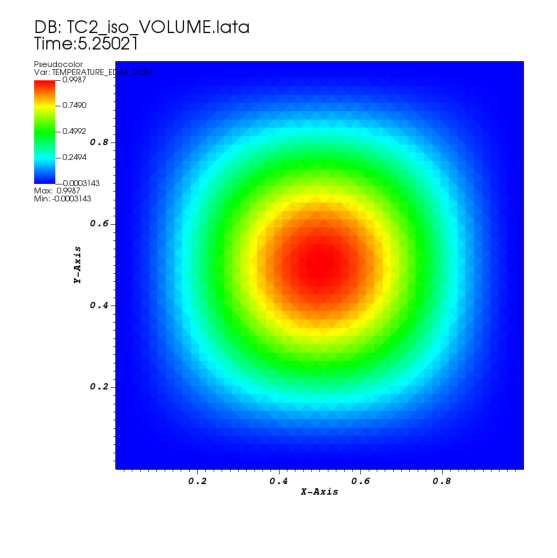

In [23]:
visit.showField("TC2/Ar1_iso/M1/TC2_iso_VOLUME.lata","Pseudocolor","TEMPERATURE_ELEM_DOM",plotmesh=False)

### Difference from analytical solution (Isotropic) : M1

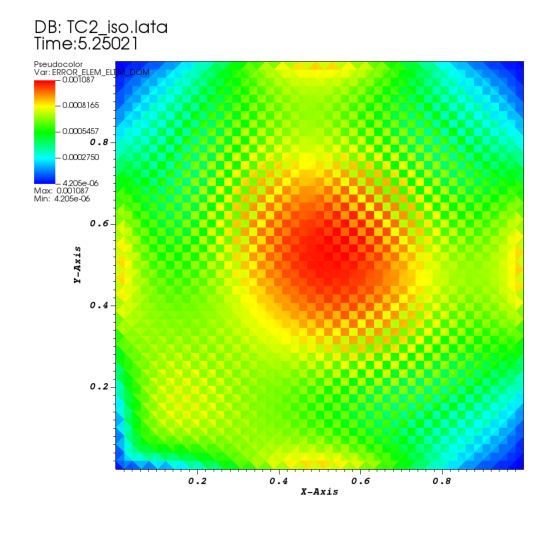

In [24]:
visit.showField("TC2/Ar1_iso/M1/TC2_iso.lata","Pseudocolor","ERROR_ELEM_ELEM_DOM",plotmesh=False)

### Temperature at steady state (Isotropic conductivity) : M2

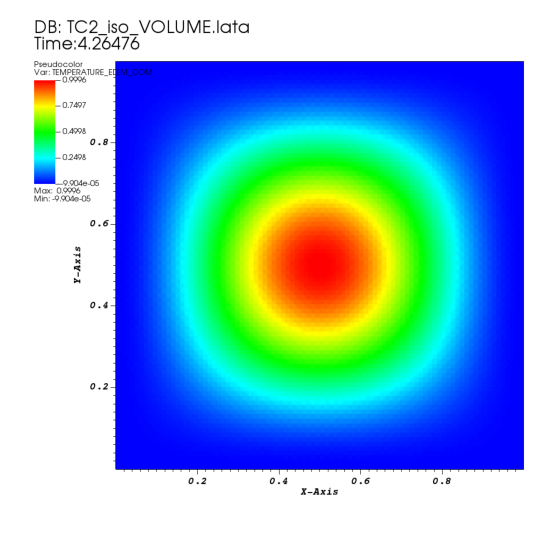

In [25]:
visit.showField("TC2/Ar1_iso/M2/TC2_iso_VOLUME.lata","Pseudocolor","TEMPERATURE_ELEM_DOM",plotmesh=False)

### Difference from analytical solution (Isotropic) : M2

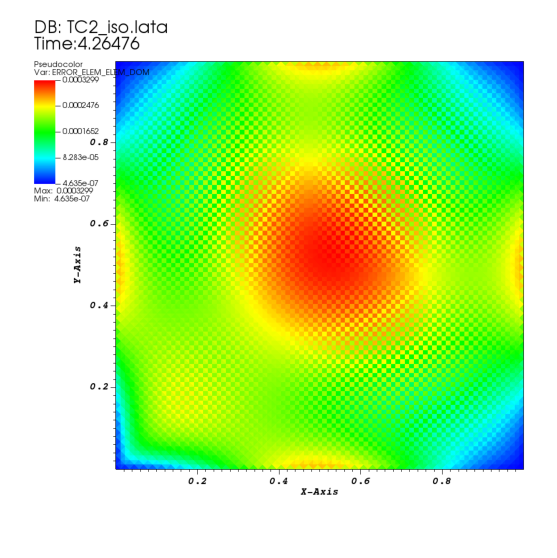

In [26]:
visit.showField("TC2/Ar1_iso/M2/TC2_iso.lata","Pseudocolor","ERROR_ELEM_ELEM_DOM",plotmesh=False)

### Temperature at steady state (Isotropic conductivity) : M3

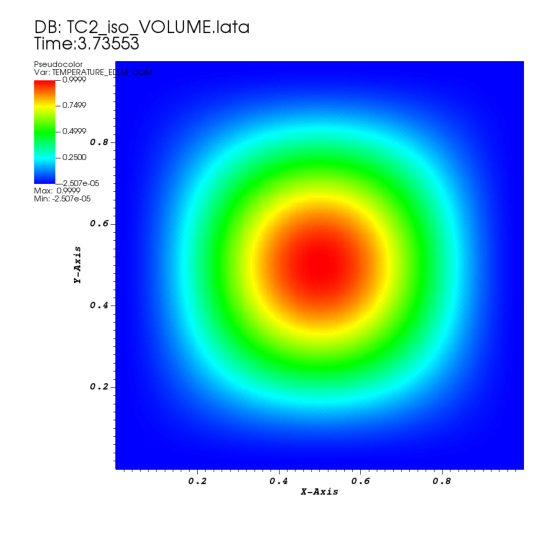

In [27]:
visit.showField("TC2/Ar1_iso/M3/TC2_iso_VOLUME.lata","Pseudocolor","TEMPERATURE_ELEM_DOM",plotmesh=False)

### Difference from analytical solution (Isotropic) : M3

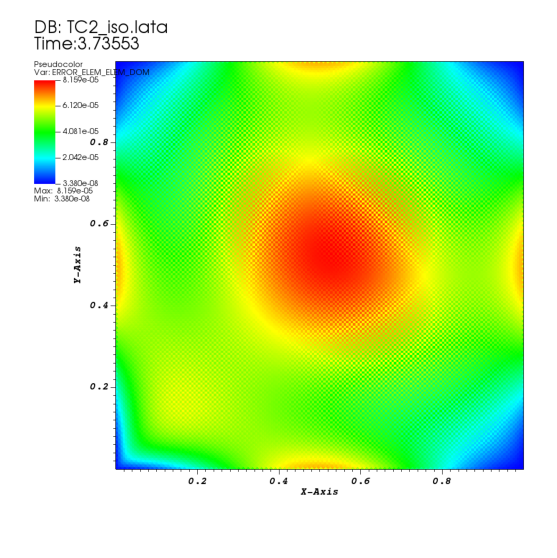

In [28]:
visit.showField("TC2/Ar1_iso/M3/TC2_iso.lata","Pseudocolor","ERROR_ELEM_ELEM_DOM",plotmesh=False)

## Results of test case 2 with $Ar= 10$

When the anisotropy ratio is set to 10,  all terms of the conductivity tensor are non-zero.  Recall thatthe tensor, from its definition, positive-definit and symmetrical.  Figures 5.1-5.3 depict the distributionof  theκcomponents.   It  is  clear  now  that  the  extra-diagonal  components  of  the  tensor  are  obliquelyconcentrated.   We  note  for  mesh  M1  that  the  time  required  to  achieve  a  steady  state  is  a  bit  longercompared to the previous calculation withAr= 1 and same mesh (physical time of 7.7 s compared to 5.3s).  This is surely the effect of the increase in the anisotropic ratio.  The obtained temperature distributionis shown in figure 5.4 and the difference from the analytical solution is considered in absolute value infigure 5.5.  Again, for same reasons as before, the difference between the numerical solution and the exactsolution takes a maximum value of about $4.10^{-3}K$ near the boundary $\partial \Omega$.  The numerical resolution improves and the time required to attain a steady state reduces by refining the mesh.  See figures 5.6 and 5.7 for M2, figures 5.8 and 5.9 for M3.  Again, having an error at the order of $3.10^{-4}K$ is mainly related to the VEF discretization and the fact of the diffusion dominance along the diagonal of the squared domain.

### Conductivity tensor : component 1

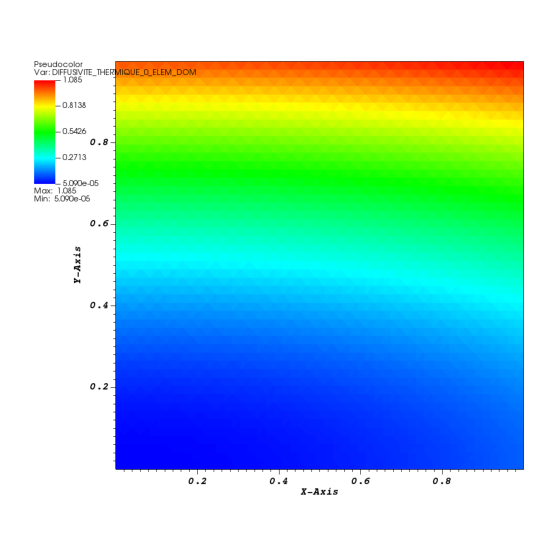

In [29]:
a = visit.Show("TC2/Ar10/M1/TC2_VOLUME.lata","Pseudocolor","DIFFUSIVITE_THERMIQUE_0_ELEM_DOM",plotmesh=False)
a.visuOptions(['no_databaseinfo'])
a.plot()

### Conductivity tensor : component 2 (or 3)

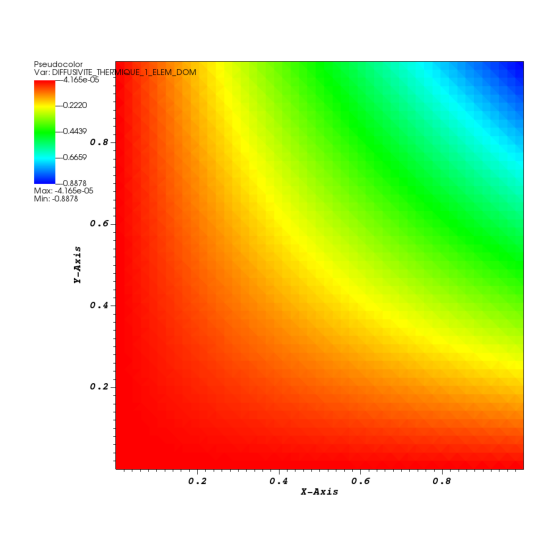

In [30]:
a = visit.Show("TC2/Ar10/M1/TC2_VOLUME.lata","Pseudocolor","DIFFUSIVITE_THERMIQUE_1_ELEM_DOM",plotmesh=False)
a.visuOptions(['no_databaseinfo'])
a.plot()

### Conductivity tensor : component 4

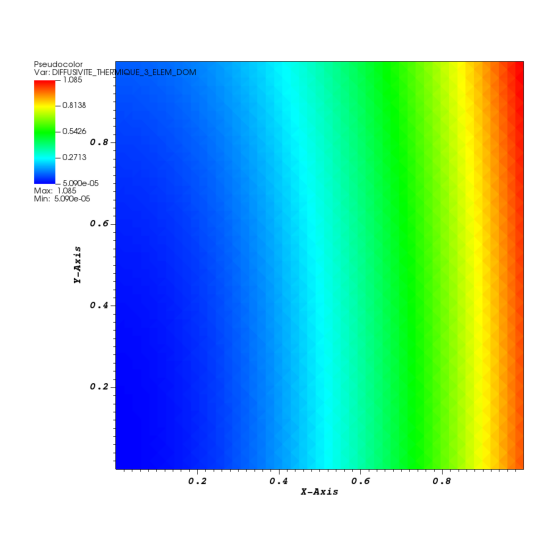

In [31]:
a = visit.Show("TC2/Ar10/M1/TC2_VOLUME.lata","Pseudocolor","DIFFUSIVITE_THERMIQUE_3_ELEM_DOM",plotmesh=False)
a.visuOptions(['no_databaseinfo'])
a.plot()

### Temperature at steady state : M1

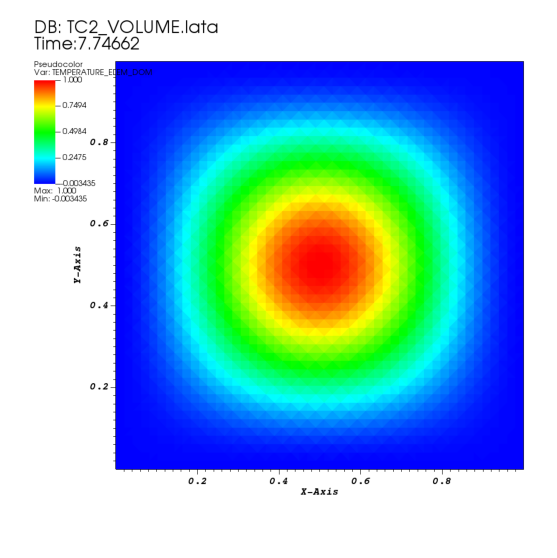

In [32]:
visit.showField("TC2/Ar10/M1/TC2_VOLUME.lata","Pseudocolor","TEMPERATURE_ELEM_DOM",plotmesh=False)

### Difference from analytical solution (absolute value) : M1

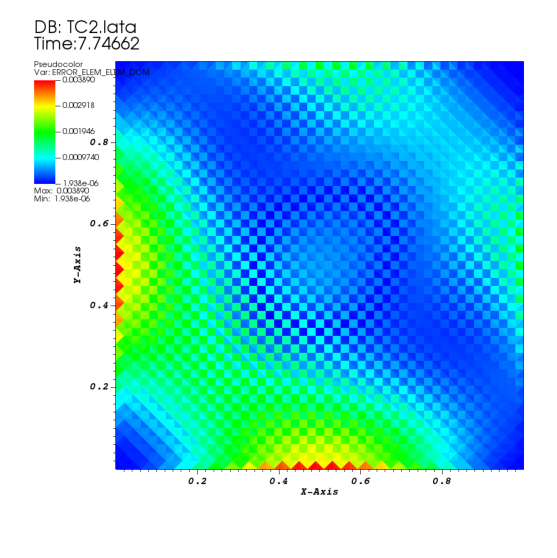

In [33]:
visit.showField("TC2/Ar10/M1/TC2.lata","Pseudocolor","ERROR_ELEM_ELEM_DOM",plotmesh=False)

### Temperature at steady state : M2

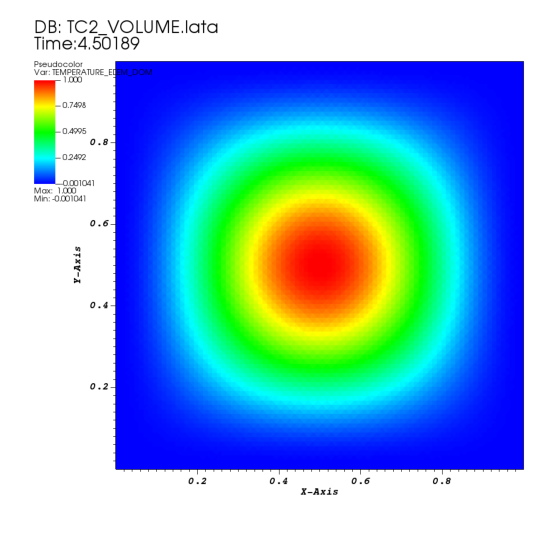

In [34]:
visit.showField("TC2/Ar10/M2/TC2_VOLUME.lata","Pseudocolor","TEMPERATURE_ELEM_DOM",plotmesh=False)

### Difference from analytical solution (absolute value) : M2

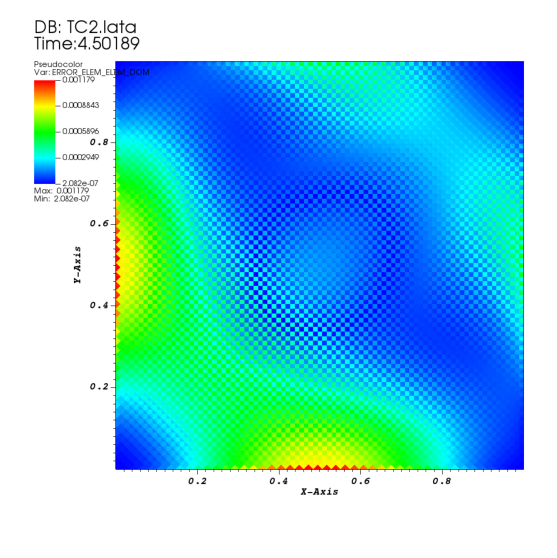

In [35]:
visit.showField("TC2/Ar10/M2/TC2.lata","Pseudocolor","ERROR_ELEM_ELEM_DOM",plotmesh=False)

### Temperature at steady state : M3

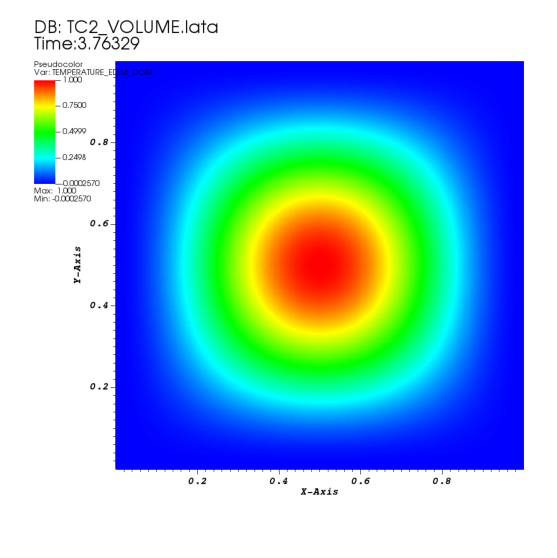

In [36]:
visit.showField("TC2/Ar10/M3/TC2_VOLUME.lata","Pseudocolor","TEMPERATURE_ELEM_DOM",plotmesh=False)

### Difference from analytical solution (absolute value) : M3

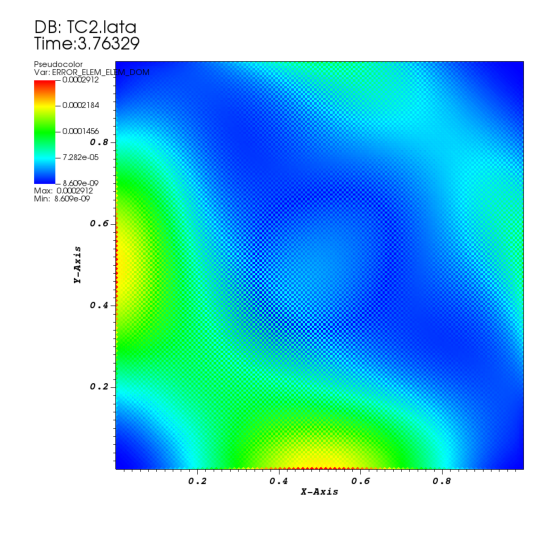

In [37]:
visit.showField("TC2/Ar10/M3/TC2.lata","Pseudocolor","ERROR_ELEM_ELEM_DOM",plotmesh=False)

## Results of test case 2 with $Ar= 100$

Figures 6.1-6.3 show the distribution of the $\kappa$ components when the anisotropy ratio is set to 100.  Withmesh M1, the obtained temperature distribution (at steady state) is shown in figure 6.4 and the differencefrom the analytical solution is plotted in absolute value in figure 6.5.  Here, we note that the error values increase.  Beside the problematic of the diagonal propagation and the VEF discretization, we note fromthe  temperature  field  that  the  solution  contains  some  parasitic  behavior. Moreover,  we  note  that  the physical time required to attain a steady state is much longer than the previous calculations (here we achieve a steady state after 63 s of physical time).  A clear influence of the mesh is noted when M2 is employed where the steady state time reduces to about 12 s.  Moreover, the parasitic behavior is improved as seen in figure 6.6 and the error is reduced (figure 6.7).  Much better improvements are recorded with the finest mesh M3 (see figures 6.8 and 6.9).  Here, the steady solution is obtained at a physical time of 4s, but the error remains high (order of $3.10^{-3}K$ at maximum near boundaries).  As a conclusion, it can be stated that increasing the anisotropic ratio is challenging for the quality of the simulation and that the physical time serves as an indicator for the stability of the simulation and the quality of the results. Keeping in mind the problematic of such a particular conductivity distribution and the limitation of VEF (probably), it can be stated that the solution is satisfactorly predicted and that TRUST is able to performa satisfactory numerical simulation for such a ratio of anisotropy. However, **a grid convergence study is required** to improve the numerical prediction.

### Conductivity tensor : component 1

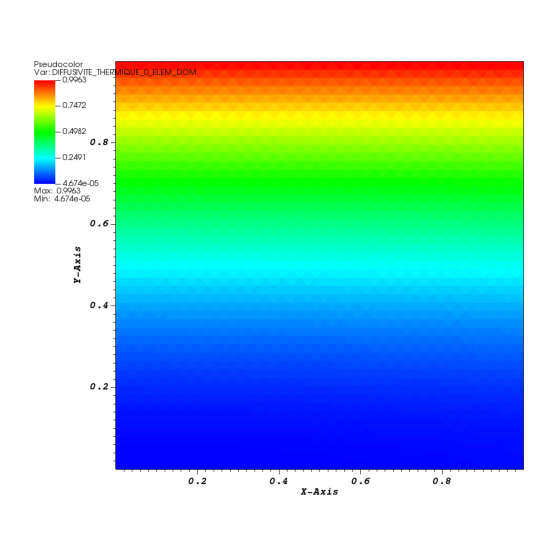

In [38]:
a = visit.Show("TC2/Ar100/M1/TC2_VOLUME.lata","Pseudocolor","DIFFUSIVITE_THERMIQUE_0_ELEM_DOM",plotmesh=False)
a.visuOptions(['no_databaseinfo'])
a.plot()

### Conductivity tensor : component 2 (or 3)

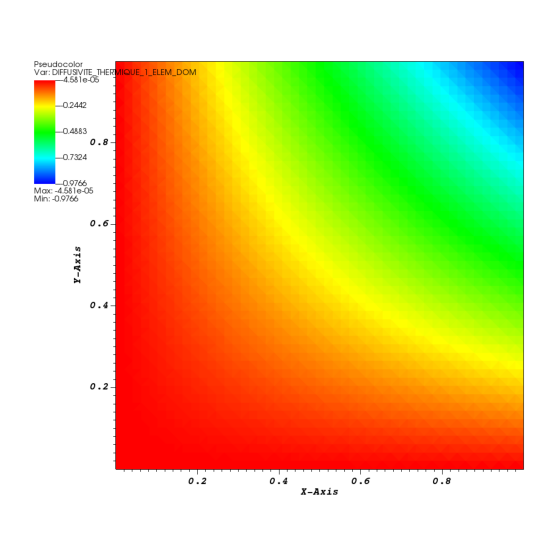

In [39]:
a = visit.Show("TC2/Ar100/M1/TC2_VOLUME.lata","Pseudocolor","DIFFUSIVITE_THERMIQUE_1_ELEM_DOM",plotmesh=False)
a.visuOptions(['no_databaseinfo'])
a.plot()

### Conductivity tensor : component 4

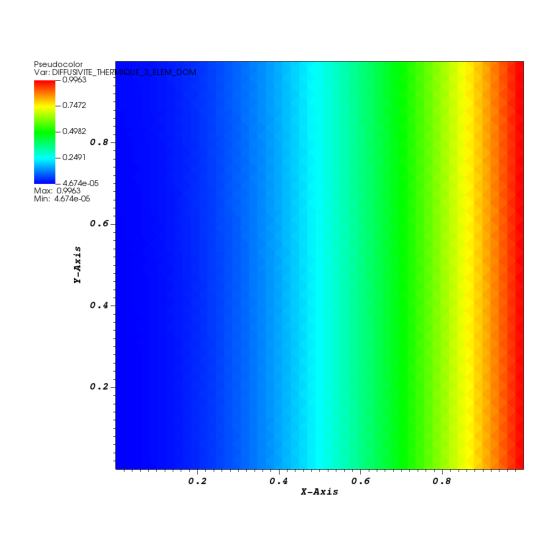

In [40]:
a = visit.Show("TC2/Ar100/M1/TC2_VOLUME.lata","Pseudocolor","DIFFUSIVITE_THERMIQUE_3_ELEM_DOM",plotmesh=False)
a.visuOptions(['no_databaseinfo'])
a.plot()

### Temperature at steady state : M1

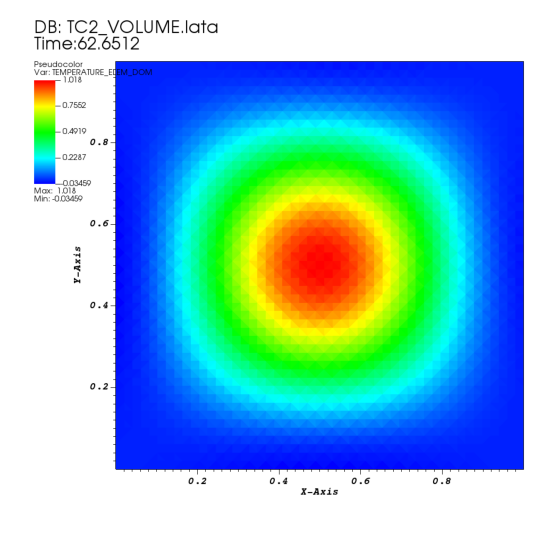

In [41]:
visit.showField("TC2/Ar100/M1/TC2_VOLUME.lata","Pseudocolor","TEMPERATURE_ELEM_DOM",plotmesh=False)

### Difference from analytical solution (absolute value) : M1

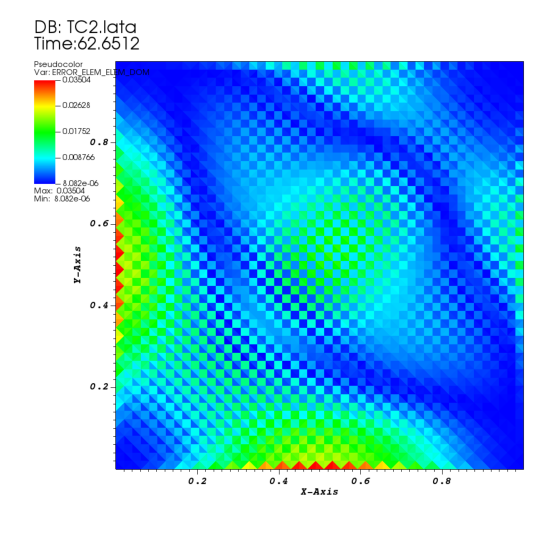

In [42]:
visit.showField("TC2/Ar100/M1/TC2.lata","Pseudocolor","ERROR_ELEM_ELEM_DOM",plotmesh=False)

### Temperature at steady state : M2

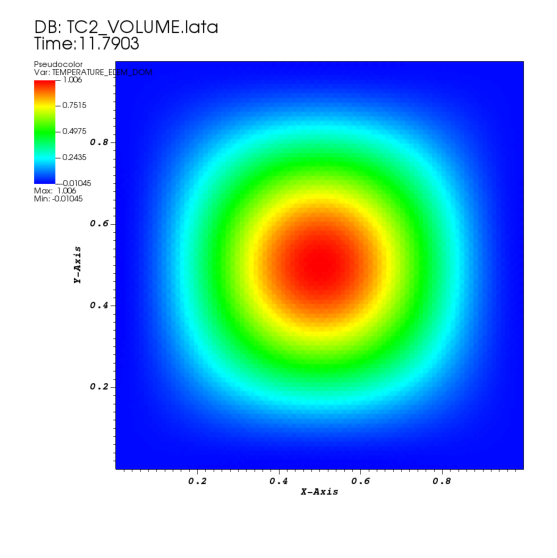

In [43]:
visit.showField("TC2/Ar100/M2/TC2_VOLUME.lata","Pseudocolor","TEMPERATURE_ELEM_DOM",plotmesh=False)

### Difference from analytical solution (absolute value) : M2

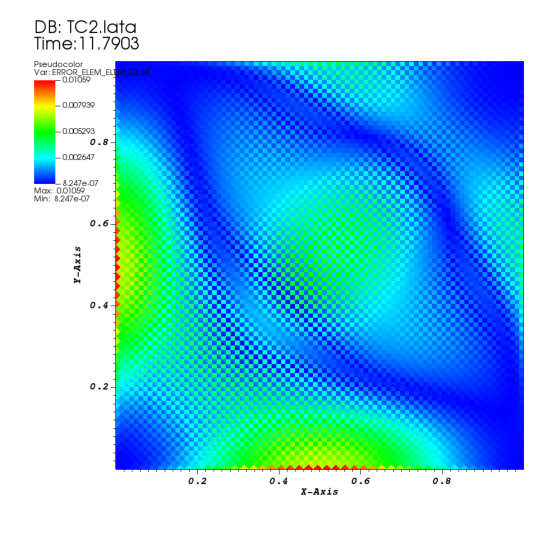

In [44]:
visit.showField("TC2/Ar100/M2/TC2.lata","Pseudocolor","ERROR_ELEM_ELEM_DOM",plotmesh=False)

### Temperature at steady state : M3

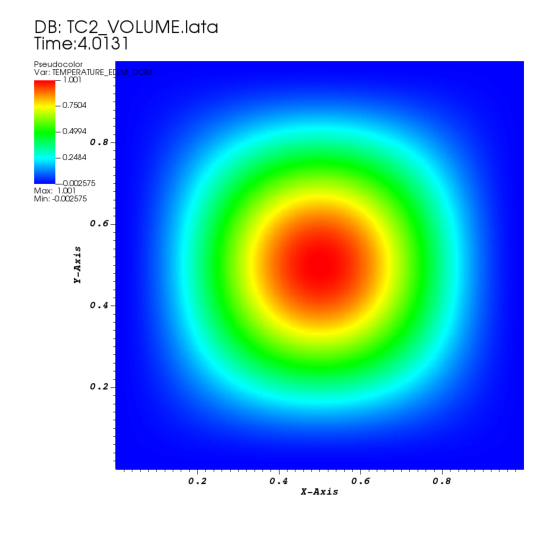

In [45]:
visit.showField("TC2/Ar100/M3/TC2_VOLUME.lata","Pseudocolor","TEMPERATURE_ELEM_DOM",plotmesh=False)

### Difference from analytical solution (absolute value) : M3

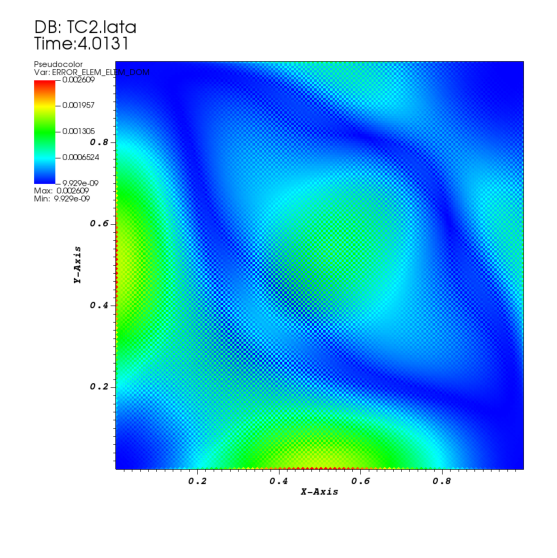

In [46]:
visit.showField("TC2/Ar100/M3/TC2.lata","Pseudocolor","ERROR_ELEM_ELEM_DOM",plotmesh=False)

## Test case 2 : $Ar= 1000$

Further numerical issues rise when the anisotropic ratio is increased to $Ar= 1000$ (see figures 7.1-7.3 forthe $\kappa$ tensor).  Here, the solution obtained with meshes M1 and M2 are wrong and very far from the realsolution (see figures 7.4-7.7).  The steady state is very slow and attained at $t= 100$ s of physical time.  A promising improvement appears with mesh M3 as seen in figures 7.8 and 7.9.  However, surely a much finer mesh is necessary to predict a good resolution and deal with such a high anisotropic ratio of the conduction problem.

### Conductivity tensor : component 1

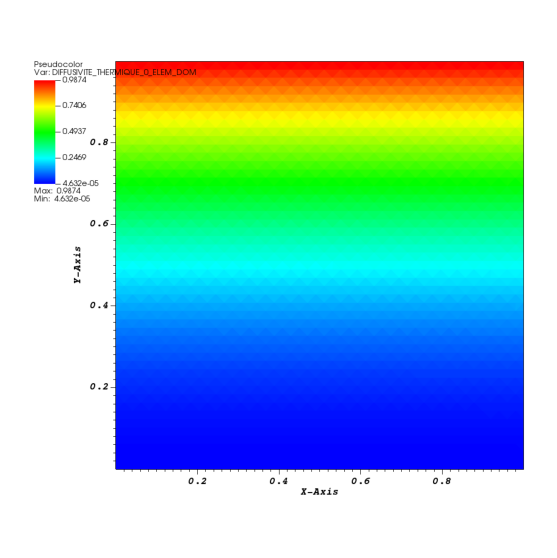

In [47]:
a = visit.Show("TC2/Ar1000/M1/TC2_VOLUME.lata","Pseudocolor","DIFFUSIVITE_THERMIQUE_0_ELEM_DOM",plotmesh=False)
a.visuOptions(['no_databaseinfo'])
a.plot()

### Conductivity tensor : component 2 (or 3)

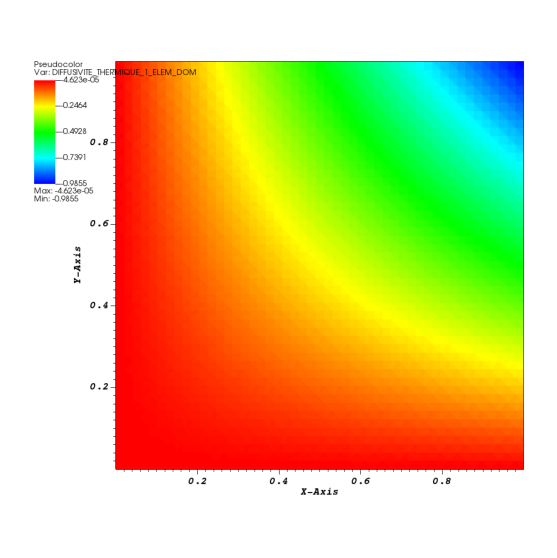

In [48]:
a = visit.Show("TC2/Ar1000/M1/TC2_VOLUME.lata","Pseudocolor","DIFFUSIVITE_THERMIQUE_1_ELEM_DOM",plotmesh=False)
a.visuOptions(['no_databaseinfo'])
a.plot()

### Conductivity tensor : component 4

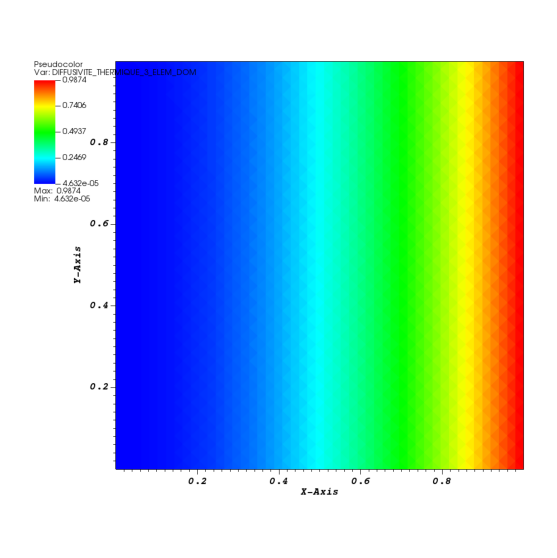

In [49]:
a = visit.Show("TC2/Ar1000/M1/TC2_VOLUME.lata","Pseudocolor","DIFFUSIVITE_THERMIQUE_3_ELEM_DOM",plotmesh=False)
a.visuOptions(['no_databaseinfo'])
a.plot()

### Temperature at steady state : M1

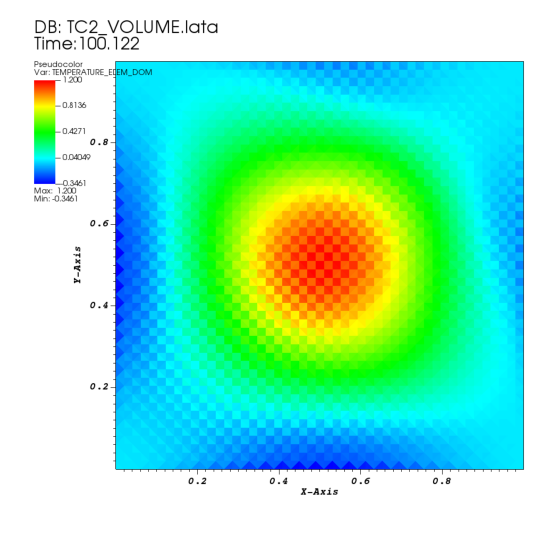

In [50]:
visit.showField("TC2/Ar1000/M1/TC2_VOLUME.lata","Pseudocolor","TEMPERATURE_ELEM_DOM",plotmesh=False)

### Difference from analytical solution (absolute value) : M1

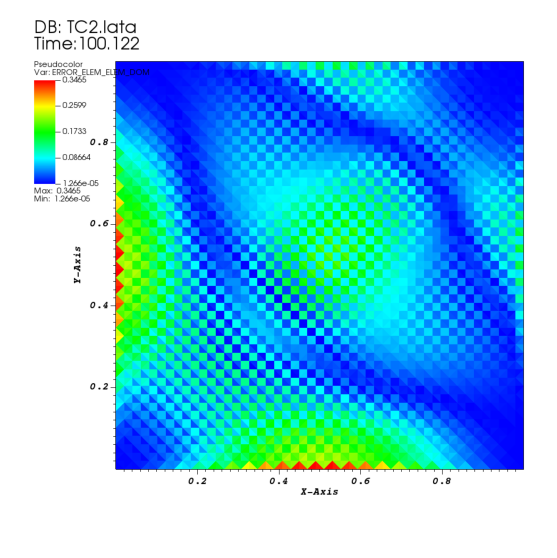

In [51]:
visit.showField("TC2/Ar1000/M1/TC2.lata","Pseudocolor","ERROR_ELEM_ELEM_DOM",plotmesh=False)

### Temperature at steady state : M2

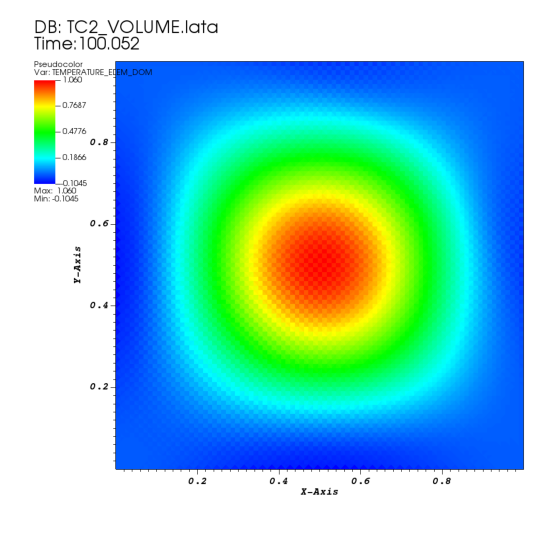

In [52]:
visit.showField("TC2/Ar1000/M2/TC2_VOLUME.lata","Pseudocolor","TEMPERATURE_ELEM_DOM",plotmesh=False)

### Difference from analytical solution (absolute value) : M2

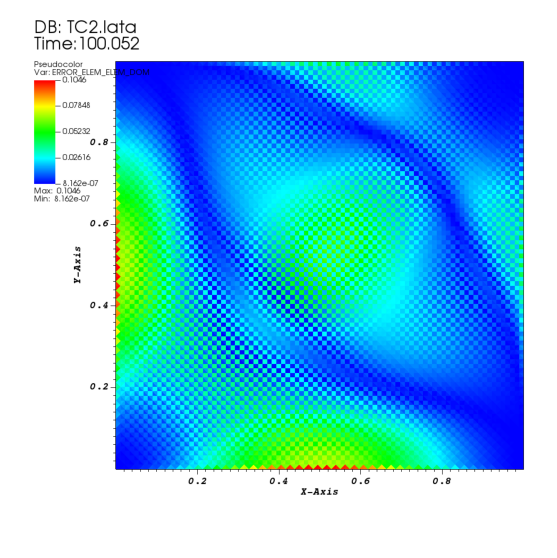

In [53]:
visit.showField("TC2/Ar1000/M2/TC2.lata","Pseudocolor","ERROR_ELEM_ELEM_DOM",plotmesh=False)

### Temperature at steady state : M3

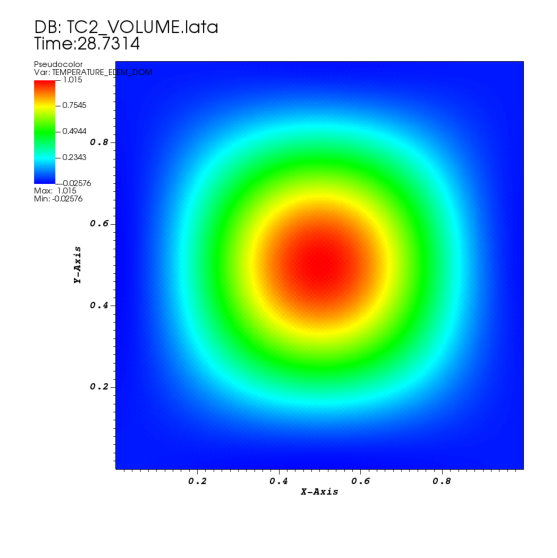

In [54]:
visit.showField("TC2/Ar1000/M3/TC2_VOLUME.lata","Pseudocolor","TEMPERATURE_ELEM_DOM",plotmesh=False)

### Difference from analytical solution (absolute value) : M3

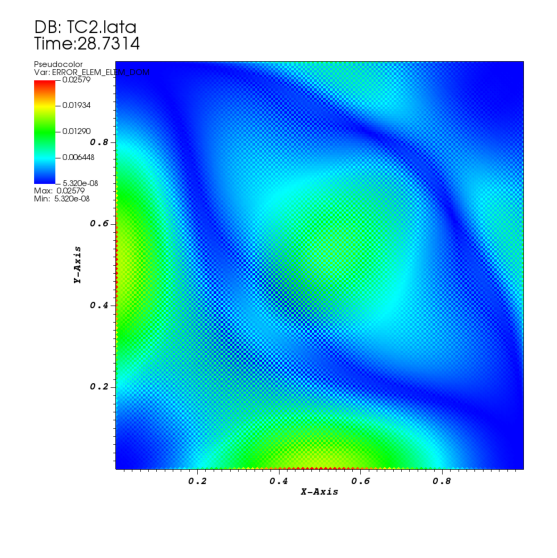

In [55]:
visit.showField("TC2/Ar1000/M3/TC2.lata","Pseudocolor","ERROR_ELEM_ELEM_DOM",plotmesh=False)

## Max and average error

The table below summarizes the maximum and average error values obtained in all cases at the steady state. It can be clearly noted how the numerical issues rise by increasing the anisotropy ratio, athough that the error decreases by refining the mesh (for test case 2 basically). This probably show some limitation of the VEF anisotropic diffusion.

In [56]:
from trustutils import plot
import pandas as pd

Cas1 = plot.loadText("./TC1/Error_values.txt", dtype=str)
Cas2_Ar1_M1 = plot.loadText("./TC2/Ar1/M1/Error_values.txt", dtype=str)
Cas2_Ar10_M1 = plot.loadText("./TC2/Ar10/M1/Error_values.txt", dtype=str)
Cas2_Ar100_M1 = plot.loadText("./TC2/Ar100/M1/Error_values.txt", dtype=str)
Cas2_Ar1000_M1 = plot.loadText("./TC2/Ar1000/M1/Error_values.txt", dtype=str)
Cas2_Ar1_M2 = plot.loadText("./TC2/Ar1/M2/Error_values.txt", dtype=str)
Cas2_Ar10_M2 = plot.loadText("./TC2/Ar10/M2/Error_values.txt", dtype=str)
Cas2_Ar100_M2 = plot.loadText("./TC2/Ar100/M2/Error_values.txt", dtype=str)
Cas2_Ar1000_M2 = plot.loadText("./TC2/Ar1000/M2/Error_values.txt", dtype=str)
Cas2_Ar1_M3 = plot.loadText("./TC2/Ar1/M3/Error_values.txt", dtype=str)
Cas2_Ar10_M3 = plot.loadText("./TC2/Ar10/M3/Error_values.txt", dtype=str)
Cas2_Ar100_M3 = plot.loadText("./TC2/Ar100/M3/Error_values.txt", dtype=str)
Cas2_Ar1000_M3 = plot.loadText("./TC2/Ar1000/M3/Error_values.txt", dtype=str)

a = plot.Table(["Max value", "Average Value"])
a.addLigne([Cas1[0:2]],"Test Case 1")
a.addLigne([Cas2_Ar1_M1[0:2]],'Test Case 2, Ar=1 : M1')
a.addLigne([Cas2_Ar10_M1[0:2]],'Test Case 2, Ar=10 : M1')
a.addLigne([Cas2_Ar100_M1[0:2]],'Test Case 2, Ar=100 : M1')
a.addLigne([Cas2_Ar1000_M1[0:2]],'Test Case 2, Ar=1000 : M1')
a.addLigne([Cas2_Ar1_M2[0:2]],'Test Case 2, Ar=1 : M2')
a.addLigne([Cas2_Ar10_M2[0:2]],'Test Case 2, Ar=10 : M2')
a.addLigne([Cas2_Ar100_M2[0:2]],'Test Case 2, Ar=100 : M2')
a.addLigne([Cas2_Ar1000_M2[0:2]],'Test Case 2, Ar=1000 : M2')
a.addLigne([Cas2_Ar1_M3[0:2]],'Test Case 2, Ar=1 : M3')
a.addLigne([Cas2_Ar10_M3[0:2]],'Test Case 2, Ar=10 : M3')
a.addLigne([Cas2_Ar100_M3[0:2]],'Test Case 2, Ar=100 : M3')
a.addLigne([Cas2_Ar1000_M3[0:2]],'Test Case 2, Ar=1000 : M3')

a.df


Max value Average Value
Test Case 1                3.113e-11     7.132e-12
Test Case 2, Ar=1 : M1      0.001087     0.0006412
Test Case 2, Ar=10 : M1      0.00389     0.0008766
Test Case 2, Ar=100 : M1     0.03504      0.006608
Test Case 2, Ar=1000 : M1     0.3465       0.06714
Test Case 2, Ar=1 : M2     0.0003299     0.0001952
Test Case 2, Ar=10 : M2     0.001179     0.0002633
Test Case 2, Ar=100 : M2     0.01059      0.001978
Test Case 2, Ar=1000 : M2     0.1046        0.0201
Test Case 2, Ar=1 : M3     8.159e-05     4.836e-05
Test Case 2, Ar=10 : M3    0.0002912     6.473e-05
Test Case 2, Ar=100 : M3    0.002609     0.0004855
Test Case 2, Ar=1000 : M3    0.02579      0.004934

## Concluding remarks

In this report, a validation study concerning the implementation of an anisotropic diffusion operator for VEF in the TRUST platform is documented. Different simulations are performed and numerical results at steady-state are compared to analytical solutions for validations.  Two test cases are investigated, either with  an  anisotropic  discontinuous  conductivity  tensor  or  a  non-uniform  one.   The  mesh  sensitivity  is highlighted where numerical results show that TRUST can handle high anisotropic ratios only if a good mesh  is  used.   We  advise  the  user  to  perform  a  grid  convergence  study  before  starting  the  physical interpretation  of  the  numerical  data.   Till  present,  we  have  only  one  limitation  for  this  anisotropic operator: **the code can only handle a positive-definite and symmetric conductivity tensor.**

## Computer performance

In [57]:
run.tablePerf()

host system  Total CPU Time CPU time/step  \
TC1/TC1                 is244522  Linux        0.419666    0.00685826   
TC2/Ar1/M1/TC2          is244522  Linux        0.586385     0.0210521   
TC2/Ar1/M2/TC2          is244522  Linux        2.594780     0.0479653   
TC2/Ar1/M3/TC2          is244522  Linux       23.473100      0.135715   
TC2/Ar1_iso/M1/TC2_iso  is244522  Linux        0.606762     0.0218517   
TC2/Ar1_iso/M2/TC2_iso  is244522  Linux        2.953590     0.0546782   
TC2/Ar1_iso/M3/TC2_iso  is244522  Linux       29.215300      0.169133   
TC2/Ar10/M1/TC2         is244522  Linux        0.534772      0.021185   
TC2/Ar10/M2/TC2         is244522  Linux        2.091070     0.0580062   
TC2/Ar10/M3/TC2         is244522  Linux       19.393500       0.18326   
TC2/Ar100/M1/TC2        is244522  Linux        2.451840     0.0226971   
TC2/Ar100/M2/TC2        is244522  Linux        3.733000     0.0524949   
TC2/Ar100/M3/TC2        is244522  Linux       18.824500      0.181304   
TC2/Ar1000/M1/TC2       is244522  Linux        3.481380     0.0212055   
TC2/Ar1000/M2/TC2       is244522  Linux       27.778300     0.0539158   
TC2/Ar1000/M3/TC2       is244522  Linux      112.742000      0.185422   
Total                                        250.879945                 

                       number of cells  
TC1/TC1                           2500  
TC2/Ar1/M1/TC2                    4802  
TC2/Ar1/M2/TC2             15842-15842  
TC2/Ar1/M3/TC2             64082-64082  
TC2/Ar1_iso/M1/TC2_iso            4802  
TC2/Ar1_iso/M2/TC2_iso     15842-15842  
TC2/Ar1_iso/M3/TC2_iso     64082-64082  
TC2/Ar10/M1/TC2                   4802  
TC2/Ar10/M2/TC2            15842-15842  
TC2/Ar10/M3/TC2            64082-64082  
TC2/Ar100/M1/TC2                  4802  
TC2/Ar100/M2/TC2           15842-15842  
TC2/Ar100/M3/TC2           64082-64082  
TC2/Ar1000/M1/TC2                 4802  
TC2/Ar1000/M2/TC2          15842-15842  
TC2/Ar1000/M3/TC2          64082-64082  
Total